In [74]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from NN import Net
%matplotlib inline

In [85]:
x1 = torch.zeros(100,2)-1+torch.randn(100,2)
y1 = torch.zeros(100)
x2 = torch.zeros(100,2)+1+torch.randn(100,2)
y2 = torch.ones(100)
x = torch.cat((x1,x2), 0).type(torch.FloatTensor)
y = torch.cat((y1,y2), 0).type(torch.LongTensor)
x = Variable(x)
y = Variable(y)

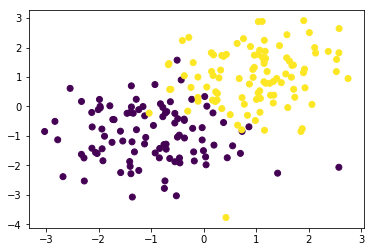

In [86]:
plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=y.data.numpy(), )

In [94]:
net = Net(2, 10, 2)
print(net)

Net (
  (hidden): Linear (2 -> 10)
  (output): Linear (10 -> 2)
)


In [95]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.5)
loss_func = torch.nn.CrossEntropyLoss()

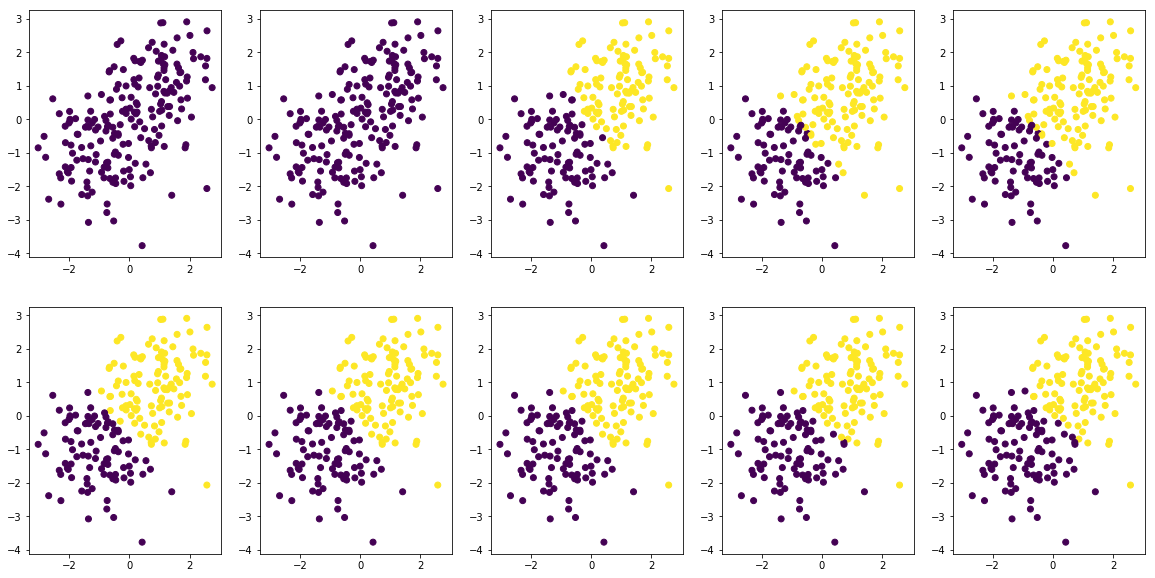

In [96]:
plt.figure(figsize=(20,10))
net.parameters()
loss_history = []
for iter_num in xrange(10):
    score = net(x)
    loss = loss_func(score, y)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.data.numpy())
    
    if iter_num%1 == 0:
        plt.subplot(2,5,iter_num+1)
        prediction = torch.zeros(200)
        prediction[score.data[:, 0] < score.data[:, 1]] = 1
        plt.scatter(x.data.numpy()[:,0], x.data.numpy()[:,1], c=prediction.numpy(), )

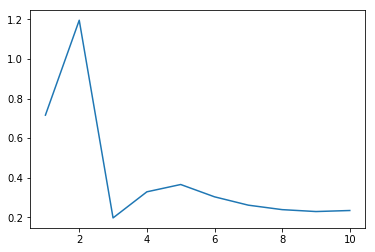

In [97]:
plt.plot(range(1, len(loss_history)+1), loss_history)